In [76]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merge_table = pd.merge(ride_data, city_data, on='city', how="left")

# Display the data table for preview
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
#list types
types= merge_table['type'].unique()
types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [4]:
#separate into DFs by type
rides_Urban = merge_table[(merge_table['type']=='Urban')]
rides_Suburban = merge_table[(merge_table['type']=='Suburban')]
rides_Rural = merge_table[(merge_table['type']=='Rural')]
rides_Rural.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2018-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2018-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2018-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2018-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2018-05-06 08:57:56,51.80,4018025271936,2,Rural


In [5]:
#CIRCLE SIZE groupby to get number of drivers per city
Urban_drivers=rides_Urban.groupby('city').mean()['driver_count']
Suburban_drivers=rides_Suburban.groupby('city').mean()['driver_count']
Rural_drivers=rides_Rural.groupby('city').mean()['driver_count']
Rural_drivers.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [6]:
#X AXIS groupby to get number of rides per city
Urban_ridecount=rides_Urban.groupby('city').count()['ride_id']
Suburban_ridecount=rides_Suburban.groupby('city').count()['ride_id']
Rural_ridecount=rides_Rural.groupby('city').count()['ride_id']
Rural_ridecount.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [7]:
#Y AXIS groupby to get avg. fare per city
Urban_fare=rides_Urban.groupby('city').mean()['fare']
Suburban_fare=rides_Suburban.groupby('city').mean()['fare']
Rural_fare=rides_Rural.groupby('city').mean()['fare']
Rural_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [8]:
#combine each into its own DF
Urban_summary_df=pd.DataFrame({'Urban_drivers':Urban_drivers, 
                               'Urban_ridecount':Urban_ridecount, 
                               'Urban_fare':Urban_fare})
Suburban_summary_df=pd.DataFrame({'Suburban_drivers':Suburban_drivers, 
                                  'Suburban_ridecount':Suburban_ridecount, 
                                  'Suburban_fare':Suburban_fare})
Rural_summary_df=pd.DataFrame({'Rural_drivers':Rural_drivers, 
                               'Rural_ridecount':Rural_ridecount, 
                               'Rural_fare':Rural_fare})

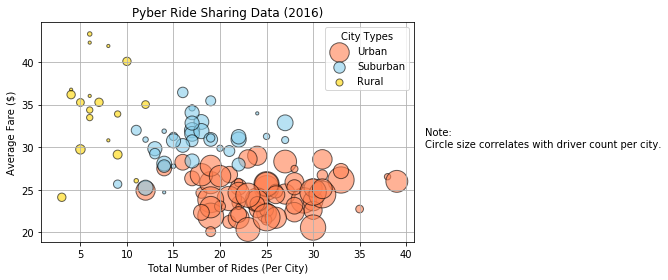

In [88]:
# Build the scatter plots for each city types
plt.scatter(Urban_ridecount, 
            Urban_fare, 
            marker="o", facecolors="coral", edgecolors="black",
            s=10*Urban_drivers, alpha=.60)

plt.scatter(Suburban_ridecount, 
            Suburban_fare, 
            marker="o", facecolors="skyblue", edgecolors="black",
            s=10*Suburban_drivers, alpha=.60)

plt.scatter(Rural_ridecount, 
            Rural_fare, 
            marker="o", facecolors="gold", edgecolors="black",
            s=10*Rural_drivers, alpha=.60)


# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.tight_layout()
plt.grid()
  

# Create a legend
labels=("Urban", "Suburban", "Rural")
plt.legend(loc="upper right", title="City Types", labels=labels)

# Incorporate a text label regarding circle size
note="Note:\nCircle size correlates with driver count per city."
plt.text(42, 30, note, fontsize=10)

# Save Figure
plt.savefig("Pyber_1_scatter.png")
plt.show()


## Total Fares by City Type

In [10]:
# Calculate Type Percents

total_fare = merge_table.sum()['fare']
Urban_total_fare = rides_Urban.sum()['fare']
Suburban_total_fare = rides_Suburban.sum()['fare']
Rural_total_fare = rides_Rural.sum()['fare']

Urban_percent_fare = Urban_total_fare / total_fare * 100
Suburban_percent_fare = Suburban_total_fare / total_fare * 100
Rural_percent_fare = Rural_total_fare / total_fare * 100


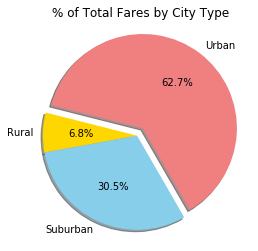

In [83]:
# Build Pie Chart
percent_fare = [Urban_percent_fare, Rural_percent_fare, Suburban_percent_fare]
colors = ["lightcoral", "gold", "skyblue"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)


plt.pie(percent_fare, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Fares by City Type")
plt.axis('scaled')


# Save Figure
plt.savefig("Pyber_2_fare_pie.png")
plt.show()

## Total Rides by City Type

In [21]:
# Calculate Ride Percents
total_rides = merge_table.count()['ride_id']
Urban_total_rides = rides_Urban.count()['ride_id']
Suburban_total_rides = rides_Suburban.count()['ride_id']
Rural_total_rides = rides_Rural.count()['ride_id']

Urban_percent_rides = Urban_total_rides / total_rides * 100
Suburban_percent_rides = Suburban_total_rides / total_rides * 100
Rural_percent_rides = Rural_total_rides / total_rides * 100


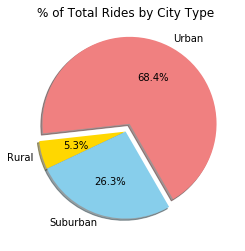

In [86]:
# Build Pie Chart
percent_rides = [Urban_percent_rides,Rural_percent_rides,Suburban_percent_rides]
colors = ["lightcoral", "gold", "skyblue"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)

plt.pie(percent_rides, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=300)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_3_ride_pie.png")
plt.show()

## Total Drivers by City Type

In [74]:
# Calculate Driver Percents
total_drivers = city_data.sum()['driver_count']

Urban_city_df= city_data[(city_data['type']=='Urban')]
Suburban_city_df= city_data[(city_data['type']=='Suburban')]
Rural_city_df= city_data[(city_data['type']=='Rural')]

Urban_total_drivers = Urban_city_df.sum()['driver_count']
Suburban_total_drivers = Suburban_city_df.sum()['driver_count']
Rural_total_drivers = Rural_city_df.sum()['driver_count']

Urban_percent_drivers = Urban_total_drivers / total_drivers * 100
Suburban_percent_drivers = Suburban_total_drivers / total_drivers * 100
Rural_percent_drivers = Rural_total_drivers / total_drivers * 100



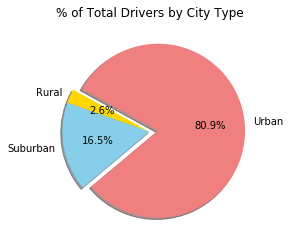

In [87]:
# Build Pie Chart
percent_drivers = [Urban_percent_drivers,Rural_percent_drivers, Suburban_percent_drivers]
colors = ["lightcoral", "gold", "skyblue"]
labels = ["Urban", "Rural", "Suburban"]
explode = (0.1, 0, 0)

plt.pie(percent_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_4_driver_pie.png")
plt.show()